# Разведочный анализ данных. Исследование и визуализация данных.

## Wine recognition dataset
https://scikit-learn.org/stable/datasets/toy_dataset.html
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

Данные представляют собой результаты химического анализа вин, выращенных в одном и том же регионе Италии тремя разными культиваторами. Для различных компонентов, содержащихся в трех типах вина, проводится тринадцать различных измерений.

Датасет содержит 13 целочисленных аттрибутов. А также предиктивный признак: класс вина.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data, target = load_wine(return_X_y=True, as_frame = True)

In [3]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
data.shape

(178, 13)

In [5]:
list(data.columns) # аттрибуты вина

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [7]:
data[data.isnull().any(axis=1)] # отсутствуют пропущенные значения

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


In [8]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
target.unique() # классы вин (целевой прризнак)

array([0, 1, 2])

## Визуальное представление

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [28]:
data_with_target = data.copy()
data_with_target['class'] = target.copy()

### Диаграмма рассеяния

<AxesSubplot:xlabel='total_phenols', ylabel='flavanoids'>

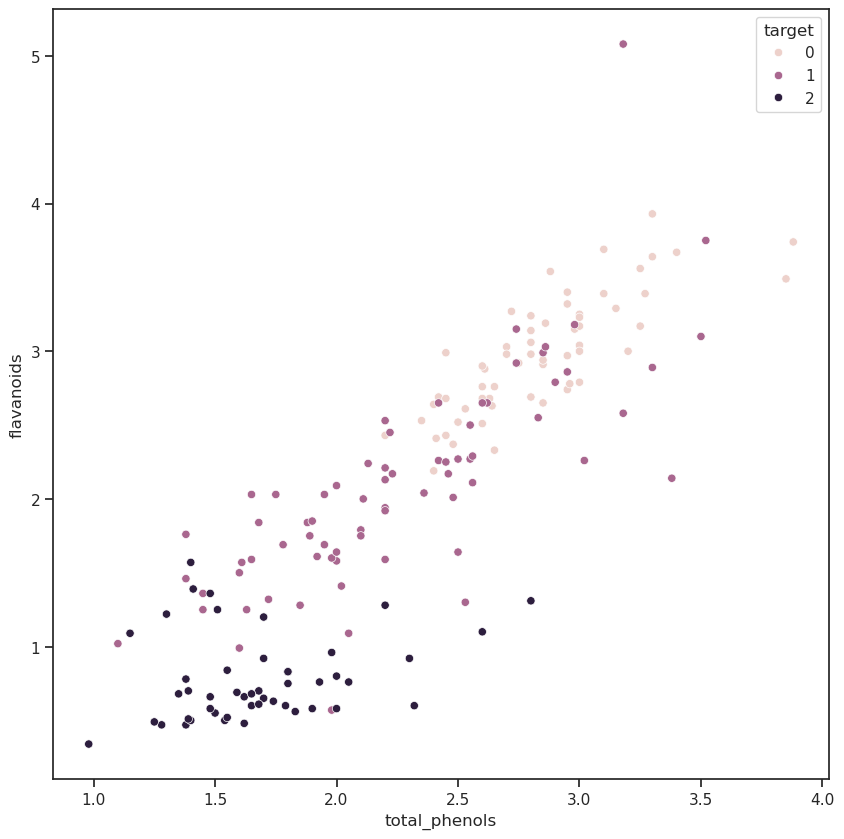

In [29]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='total_phenols', y='flavanoids', data=data, hue=target)

### Гистограмма и диаграмма рассеивания

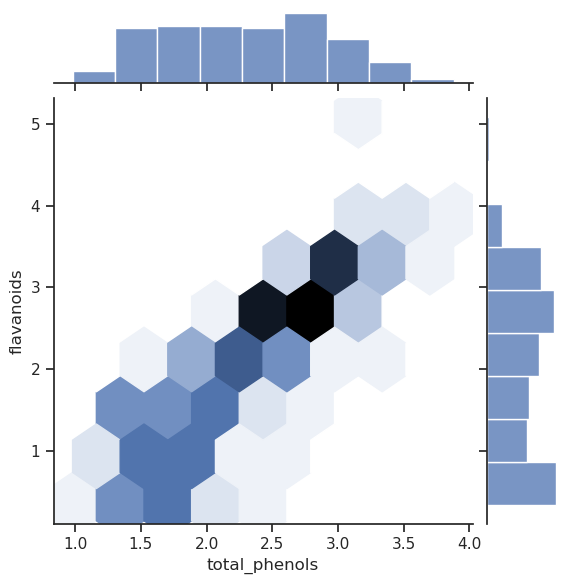

In [30]:
sns.jointplot(x='total_phenols', y='flavanoids', data=data, kind='hex')

### Violin plot (распределение) 

<AxesSubplot:xlabel='alcohol'>

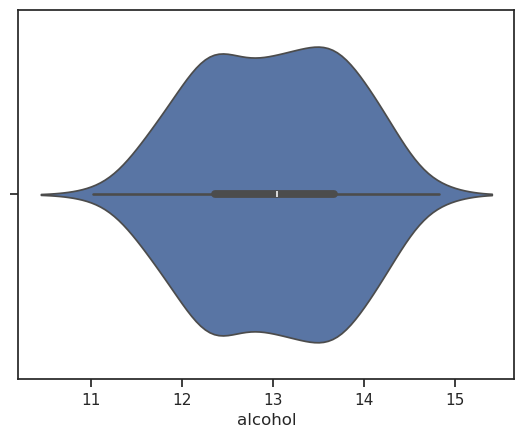

In [33]:
sns.violinplot(x=data['alcohol'])

По плотности распределения алкоголя видно, что его распределение близко к нормальному.

### Тепловая карта

<AxesSubplot:>

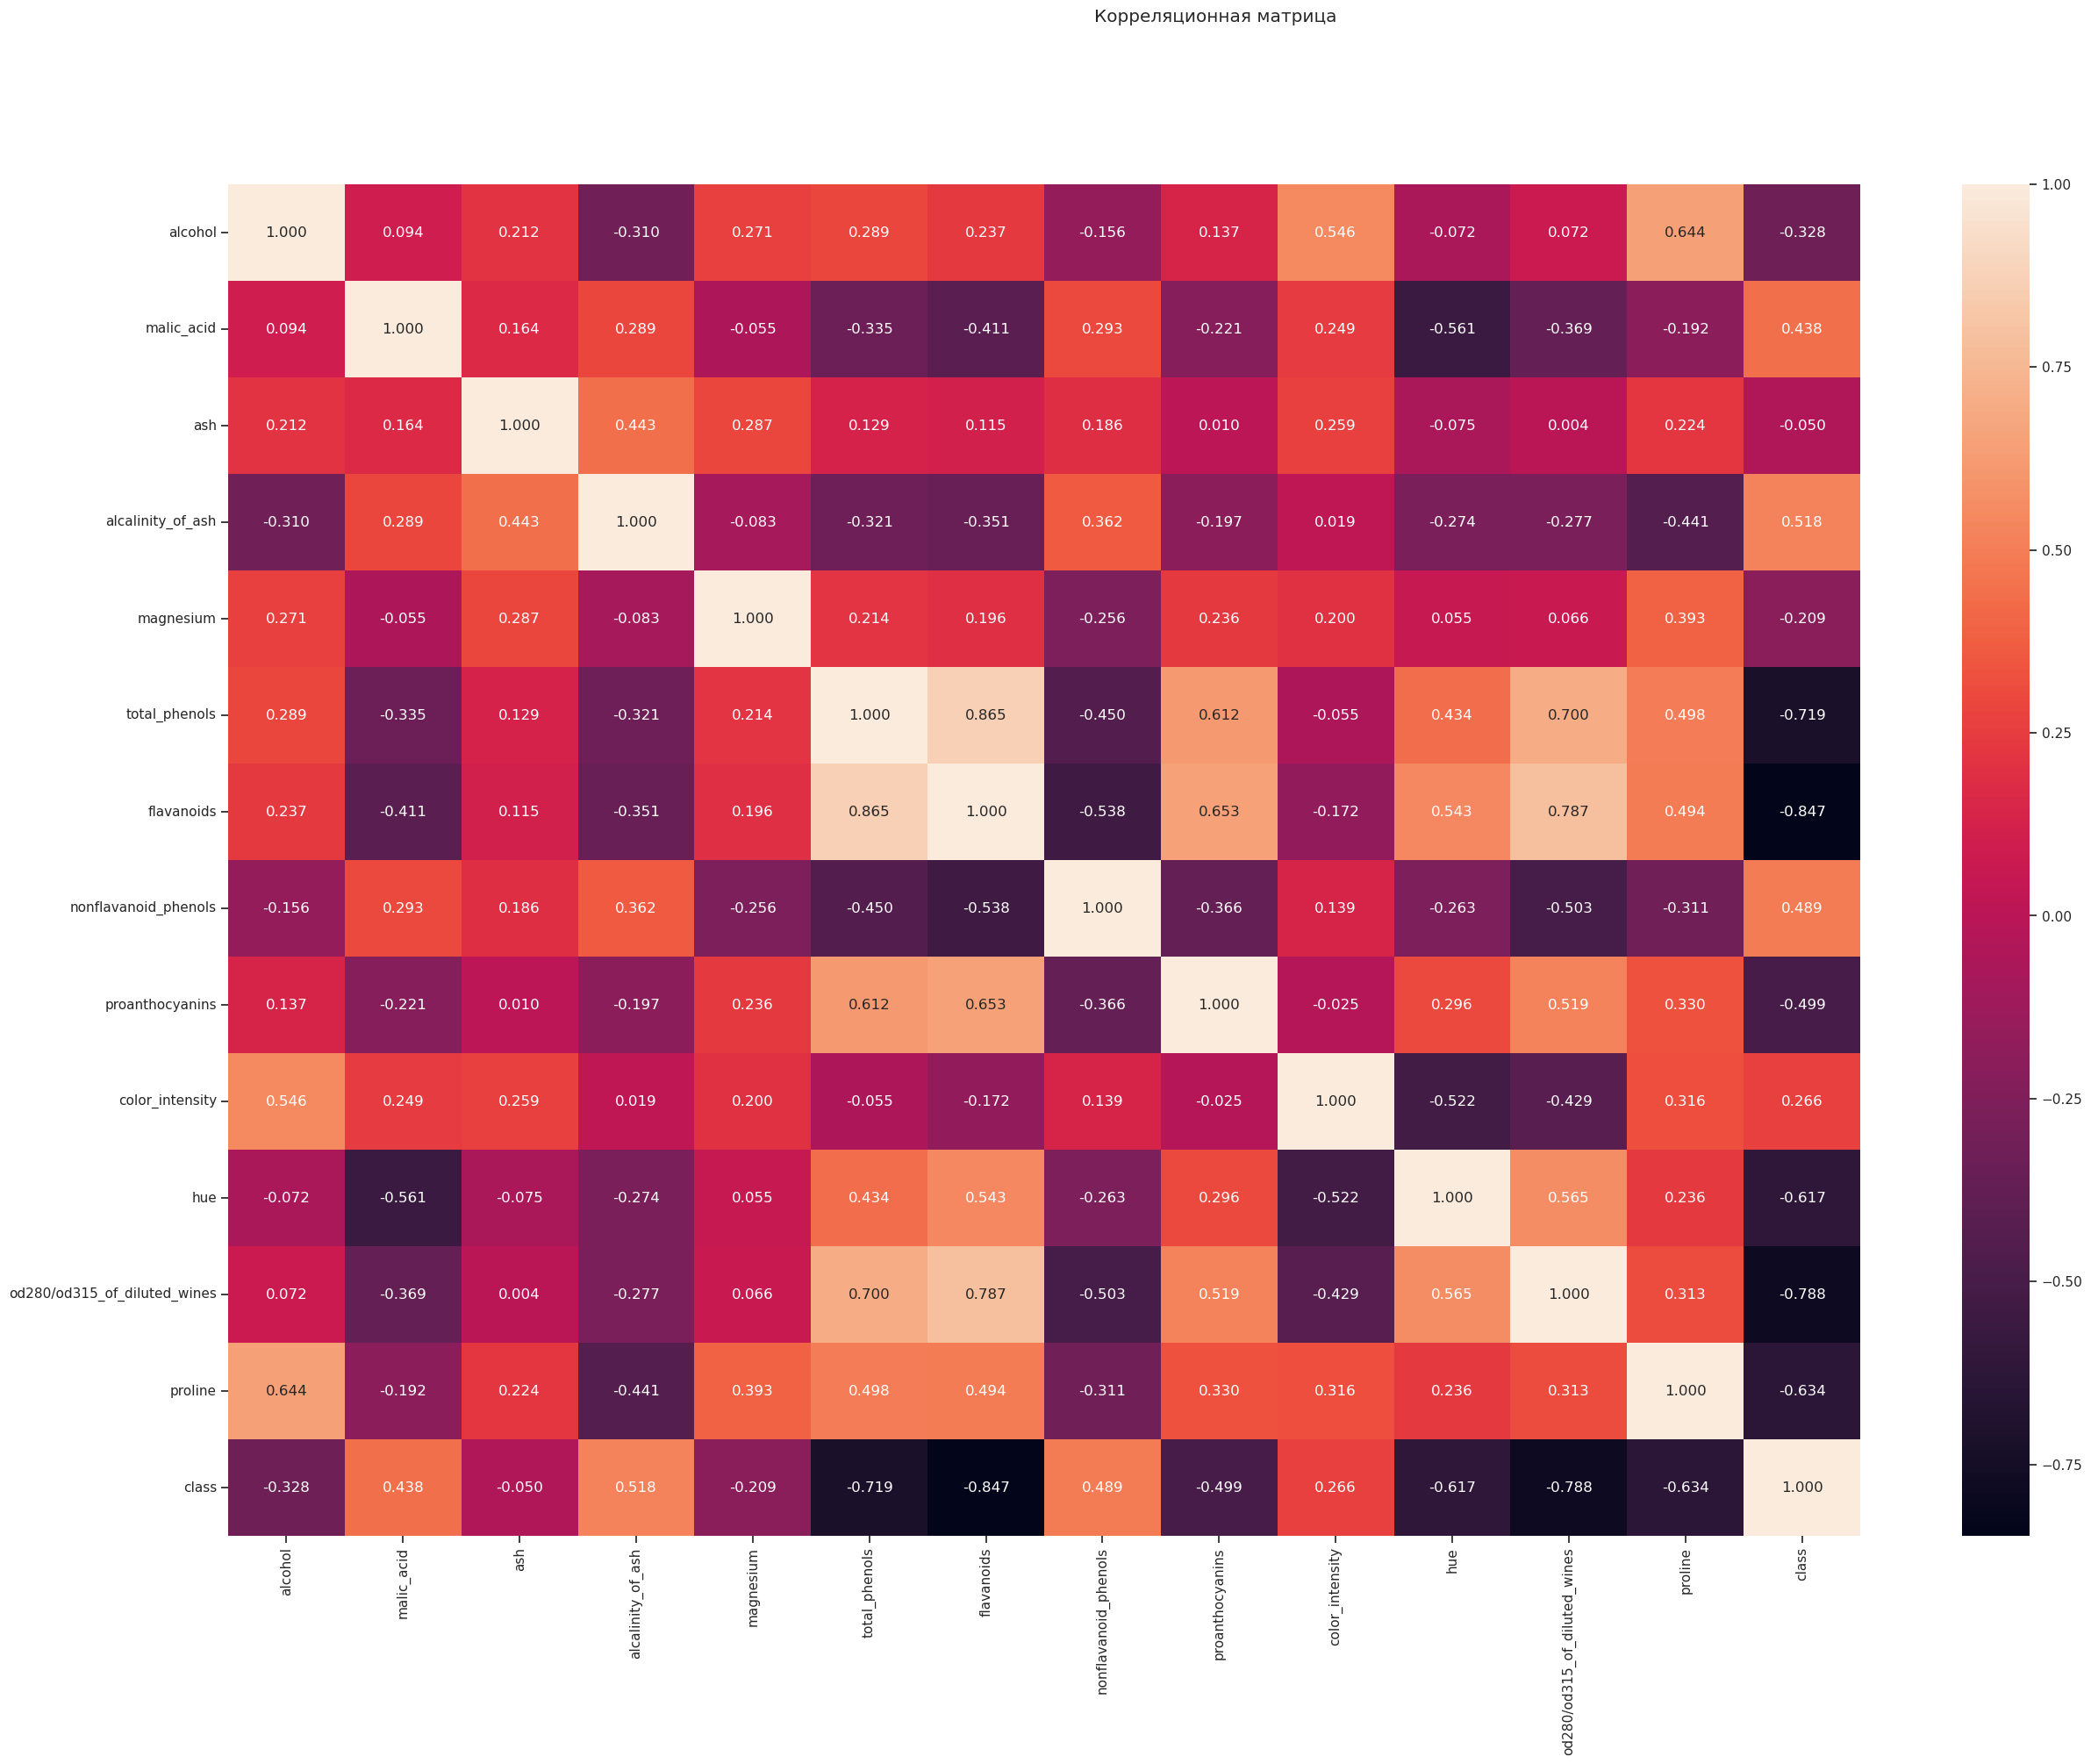

In [32]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(30,20))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data_with_target.corr(), ax=ax, annot=True, fmt='.3f')

Можно заметить, что с целевым признаком (классом вина) больше всего коррелируют:
- flavanoid (обратная зависимость)
- total_phenols (обратная зависимость)
- od280/od315 (обратная зависимость)

Корреляция между total_phenols и flavanoids была видна на диаграмме рассеивания. Так как эти признаки имеют сильную зависимость друг от друга, и коррелируют с целевым признаком, один из них можно исключить.

### Попарная диаграмма рассеивания

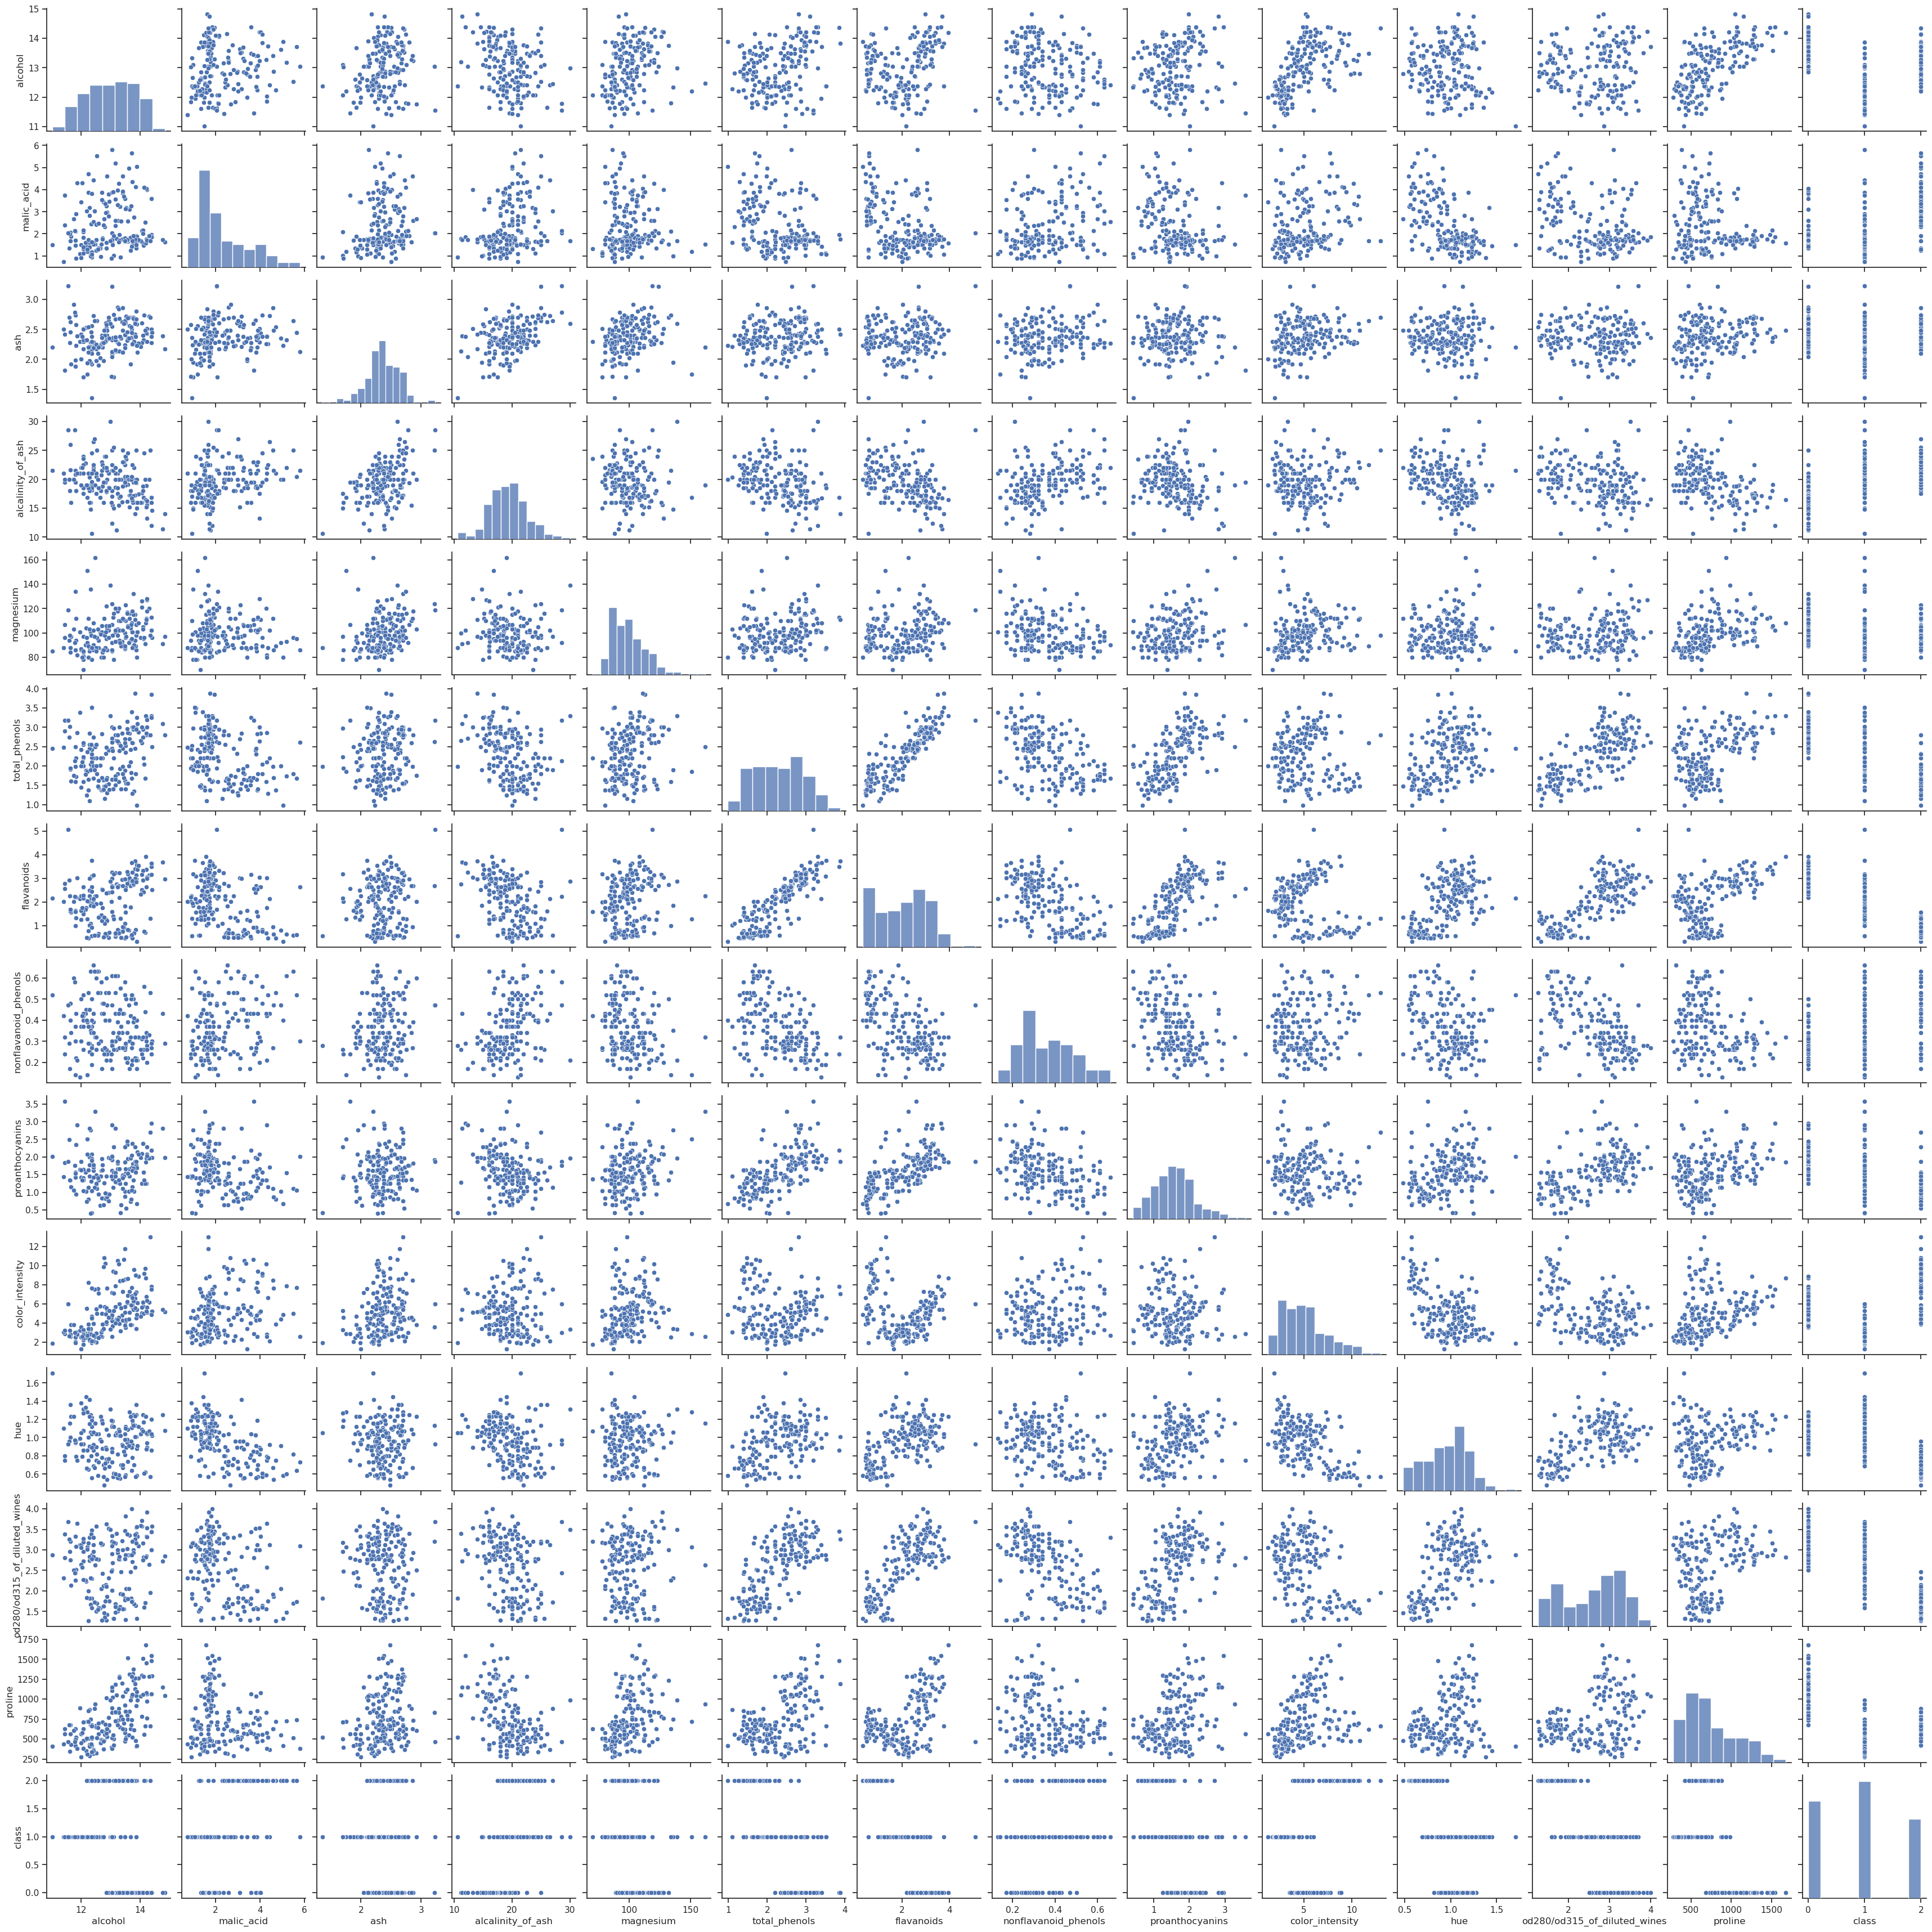

In [20]:
sns.pairplot(data_with_target)